**Bank Marketing Dataset**

**Introduction and Problem Statement**
Banks regularly roll out personal loan offers to their customers. However, not every customer accepts the offer, and blindly marketing to everyone is inefficient and costly. The goal of this project is to predict which customers are likely to accept a personal loan offer based on various demographic and behavioral features. Accurate predictions help optimize marketing campaigns and improve customer targeting, leading to better conversion rates and reduced marketing costs.

**Dataset Understanding and Description**
This project uses the Bank Marketing Dataset from the UCI Machine Learning Repository. The dataset contains information about customers contacted during a direct marketing campaign. The goal is to predict whether the client will accept a personal loan offer.

**Key features include**

 - Age – Customer’s age

 - Job – Type of job (e.g., admin, technician, management)

 - Marital Status – Married, single, or divorced

 - Education – Basic, high school, tertiary, unknown

 - Default – If the customer has credit in default

 - Housing – Whether the customer has a housing loan

 - Loan – Whether the customer has a personal loan

 - Contact – Contact communication type

 - Duration – Duration of last contact

 - Campaign – Number of contacts during the campaign

 - Poutcome – Outcome of the previous marketing campaign

- Deposit – Target variable (whether the customer accepted the offer)

**Data was cleaned and explored in Power BI.**

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Dataset
df = pd.read_csv('/kaggle/input/bank-marketing-dataset/Bank Marketing Dataset.csv')
df.head()

,age,balance,campaign,default,housing,education,job,loan,marital,pdays,deposit,duration,previous,poutcome
0,18,3,2,no,no,unknown,student,no,single,-1,yes,130,0,unknown
1,18,5,2,no,no,secondary,student,no,single,-1,no,143,0,unknown
2,18,108,1,no,no,unknown,student,no,single,-1,yes,167,0,unknown
3,18,108,1,no,no,unknown,student,no,single,-1,yes,169,0,unknown
4,18,108,1,no,no,unknown,student,no,single,183,yes,92,1,success


In [3]:
# Encode categorical variables 
df_encoded = pd.get_dummies(df, drop_first=True)

In [4]:
# Split features and target
X = df_encoded.drop('deposit_yes', axis=1)  # target column after encoding
y = df_encoded['deposit_yes']


In [5]:
# Initial Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
# Get feature importances
importances = rf_model.feature_importances_
features = X_train.columns


In [8]:
# Create a DataFrame for feature importances
feat_imp = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)


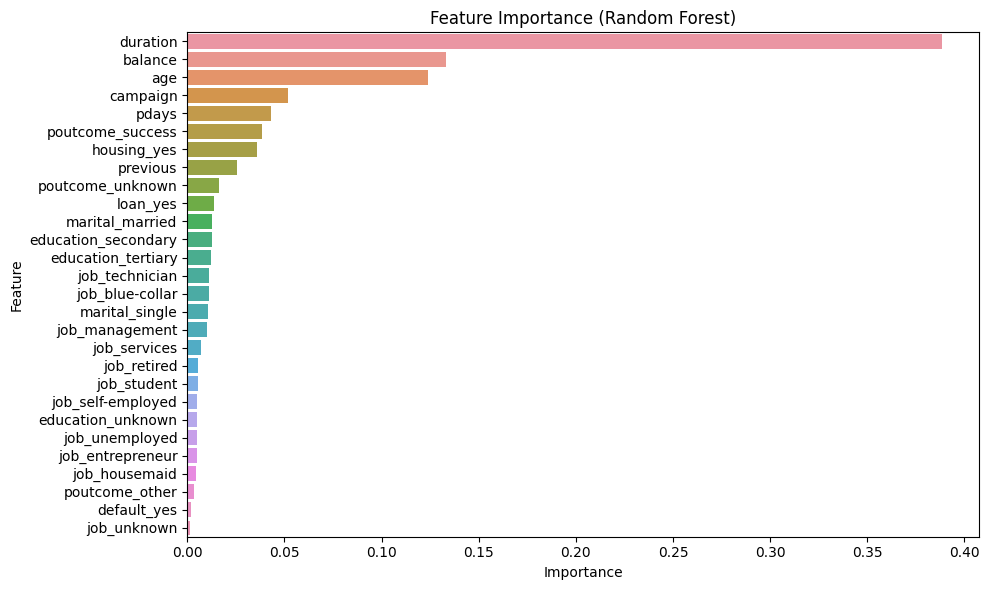

In [9]:
# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp)
plt.title('Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()

In [10]:
# Drop features with low importance (less than 0.01)
low_impact_features = feat_imp[feat_imp['Importance'] < 0.01]['Feature'].tolist()
print("Dropping:", low_impact_features)


Dropping: ['job_services', 'job_retired', 'job_student', 'job_self-employed', 'education_unknown', 'job_unemployed', 'job_entrepreneur', 'job_housemaid', 'poutcome_other', 'default_yes', 'job_unknown']


In [11]:
# Drop low importance features from X before splitting again
X_reduced = X.drop(columns=low_impact_features)


In [12]:
# New train-test split with reduced features
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)


In [13]:
# Retrain Random Forest on reduced features
rf_model_retrained = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42, class_weight='balanced')
rf_model_retrained.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=200,
                       random_state=42)

In [14]:
# Predict 
y_pred_rf = rf_model_retrained.predict(X_test)


In [15]:
#Evaluation 
print("=== Random Forest Evaluation ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf) * 100)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\n F1 Score:", (f1_score(y_test, y_pred_rf))*100)
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

=== Random Forest Evaluation ===
Accuracy: 82.84818629646216

Confusion Matrix:
 [[948 215]
 [168 902]]

 F1 Score: 82.48742569730224

Classification Report:
               precision    recall  f1-score   support

       False       0.85      0.82      0.83      1163
        True       0.81      0.84      0.82      1070

    accuracy                           0.83      2233
   macro avg       0.83      0.83      0.83      2233
weighted avg       0.83      0.83      0.83      2233



In [16]:
# Train Logistic Regression
log_model = LogisticRegression(max_iter=1000, solver='liblinear', class_weight='balanced')
log_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear')

In [17]:
# Predictions
y_pred_log = log_model.predict(X_test)
y_proba_log = log_model.predict_proba(X_test)[:,1]

In [18]:
# Evaluation
print("=== Logistic Regression Evaluation ===")
print("Accuracy:", accuracy_score(y_test, y_pred_log) * 100)
print("\nF1 Score:", f1_score(y_test, y_pred_log)*100)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

=== Logistic Regression Evaluation ===
Accuracy: 79.44469323779668

F1 Score: 77.8153697438376

Confusion Matrix:
 [[969 194]
 [265 805]]

Classification Report:
               precision    recall  f1-score   support

       False       0.79      0.83      0.81      1163
        True       0.81      0.75      0.78      1070

    accuracy                           0.79      2233
   macro avg       0.80      0.79      0.79      2233
weighted avg       0.80      0.79      0.79      2233



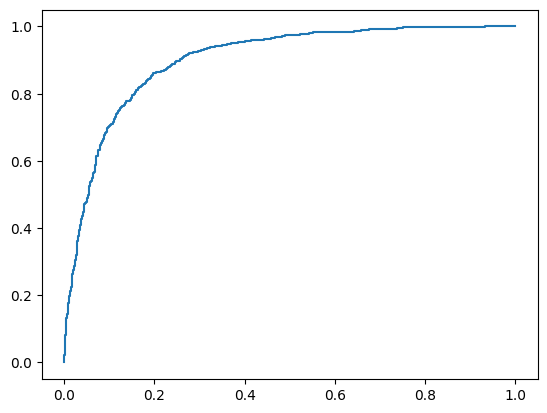

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score

# Probabilities for RF
y_proba_rf = rf_model_retrained.predict_proba(X_test)[:,1]

# ROC curve values
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
auc_rf = roc_auc_score(y_test, y_proba_rf)

plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.3f})")


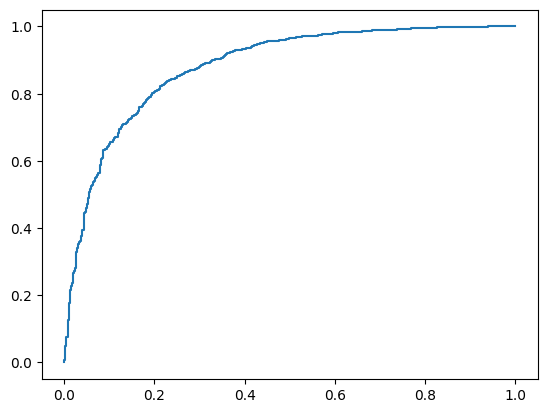

In [20]:
# Probabilities for Logistic Regression
y_proba_log = log_model.predict_proba(X_test)[:,1]

# ROC curve values
fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log)
auc_log = roc_auc_score(y_test, y_proba_log)

plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {auc_log:.3f})")


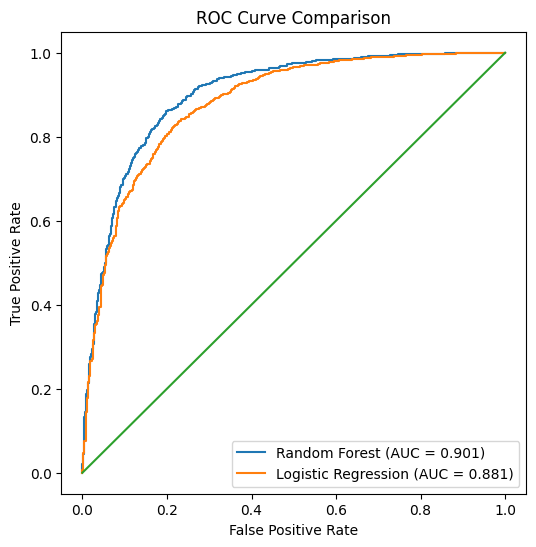

In [21]:
# Plot both
plt.figure(figsize=(6,6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.3f})")
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {auc_log:.3f})")
plt.plot([0,1], [0,1]) 
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


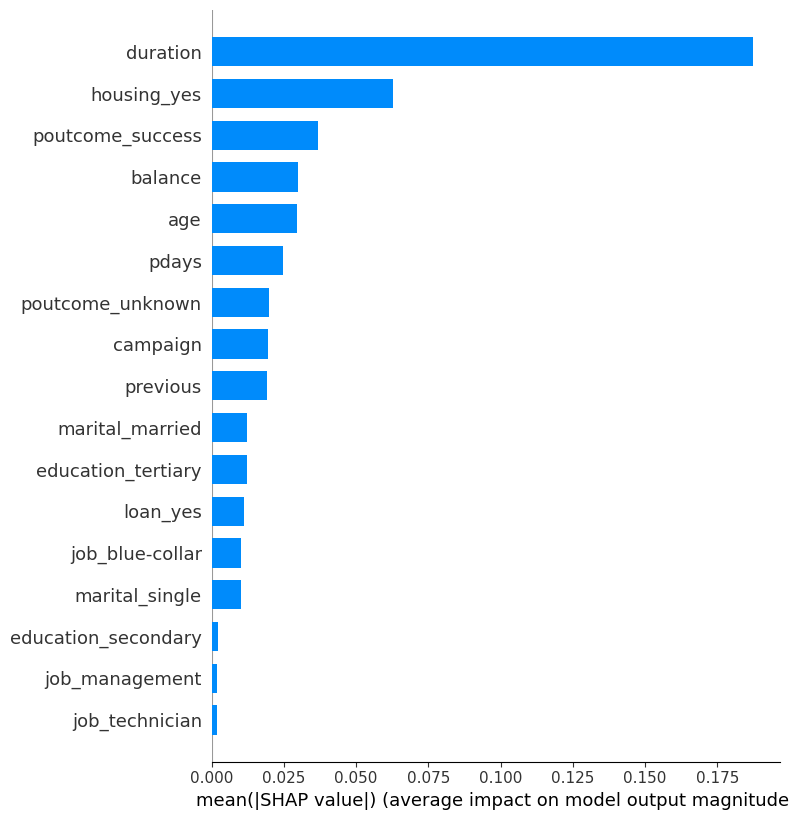

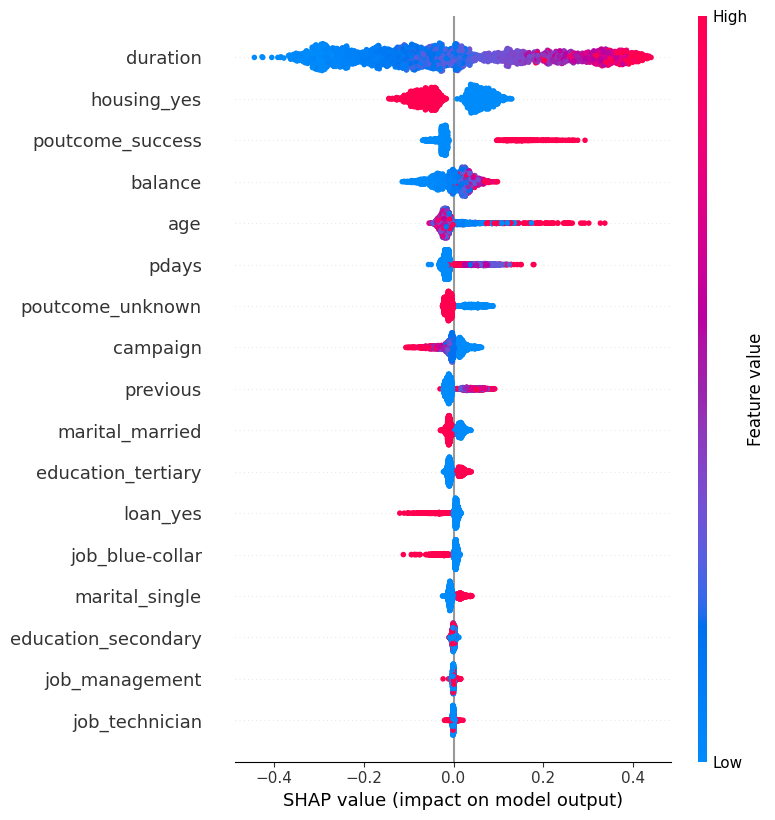

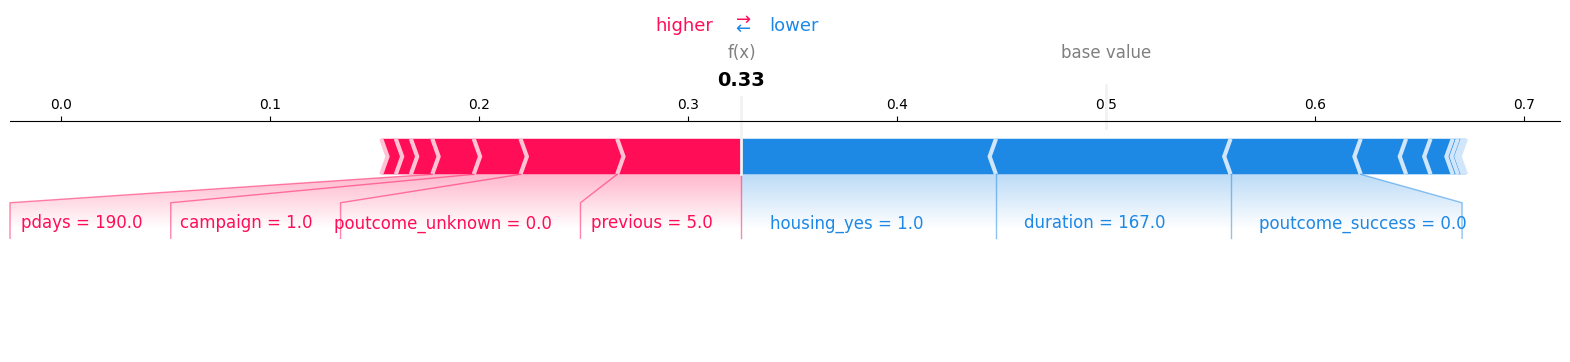

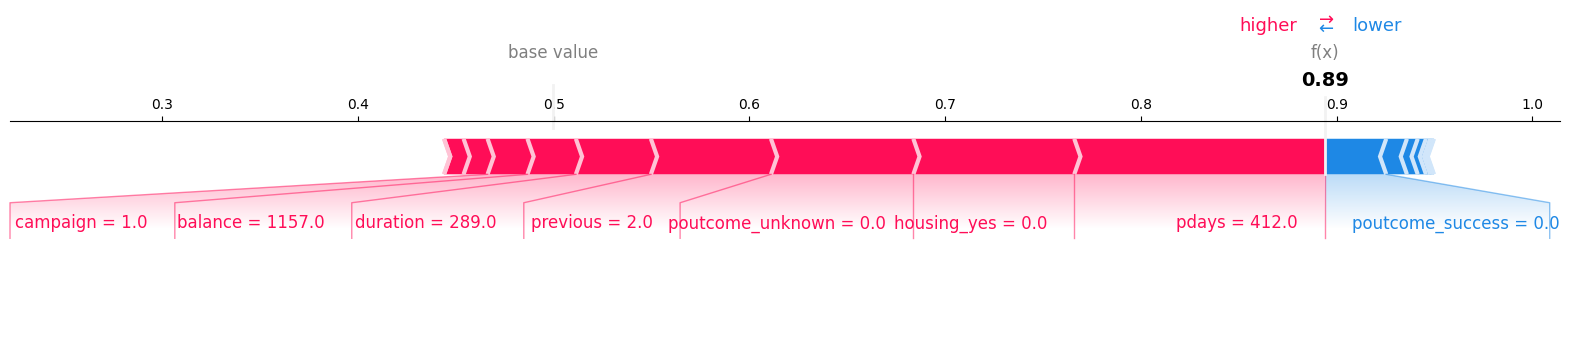

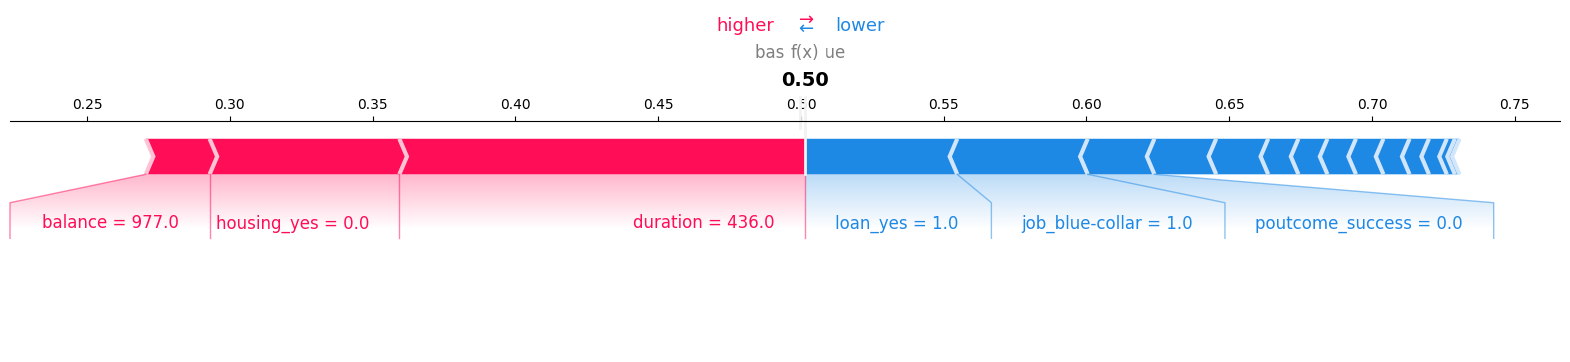

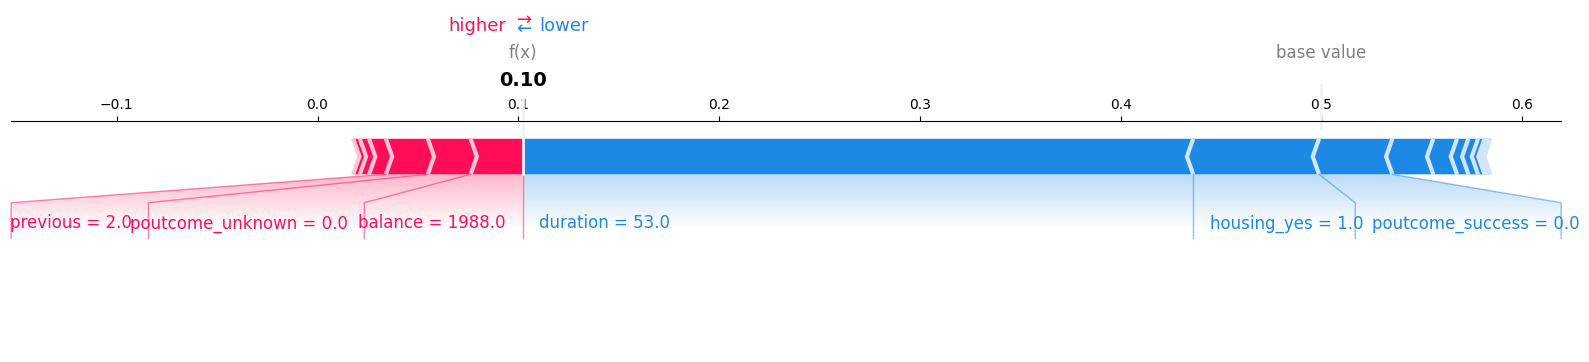

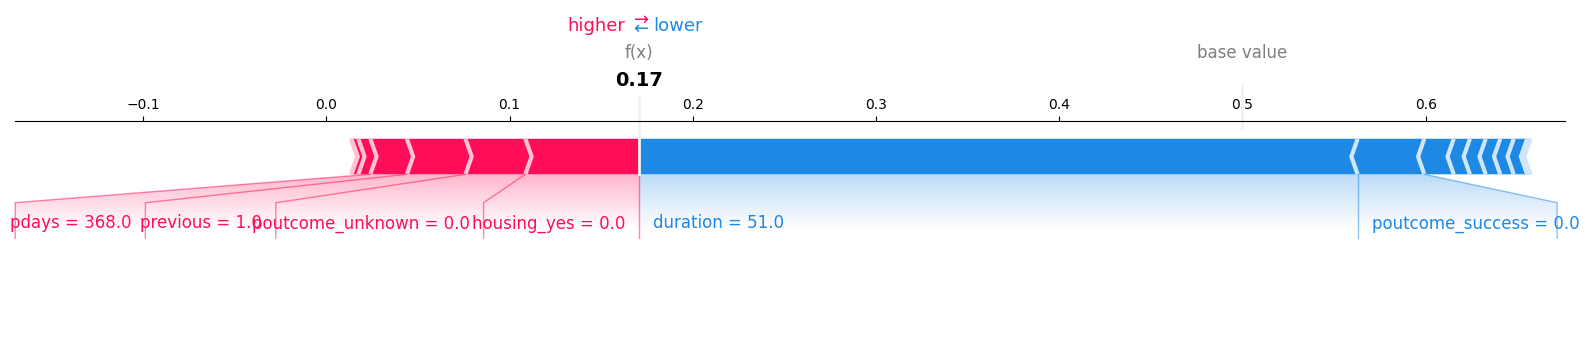

In [22]:
import shap

# Initialize explainer
explainer = shap.TreeExplainer(rf_model_retrained)
shap_values = explainer.shap_values(X_test)

# Global feature importance
shap.summary_plot(shap_values[1], X_test, plot_type="bar")

# Detailed impact distribution
shap.summary_plot(shap_values[1], X_test)

# Local explanation for 5 predictions
sample_indices = X_test.sample(5, random_state=42).index
for i in sample_indices:
    shap.force_plot(explainer.expected_value[1],
                    shap_values[1][list(X_test.index).index(i)],
                    X_test.loc[i],
                    matplotlib=True)
